<a href="https://colab.research.google.com/github/aaaksenova/RussianConstructicon_NLP_tools/blob/change/Construction_visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Визуализация статистики по конструкциям

Подсчет распределения конструкций по семантическим и синтаксическим типам. Самые частотные якоря по частям речи. 

by Аня Аксенова (akanna_a@mail.ru)

Как запустить?

1. Нажать сверху на кнопку "Open in Colab"

2. Нажать Среда выполнения –> Выполнить все

3. Дождаться верификации от гугла: перейти по ссылке, выбрать в списке свой аккаунт и скопировать код активации. Вернуться на эту страницу и вставить в поле для кода. Нажать Enter

In [1]:
! pip install spacy --upgrade
! python -m spacy download ru_core_news_md

     |████████████████████████████████| 6.0 MB 8.3 MB/s 
     |████████████████████████████████| 628 kB 69.2 MB/s 
     |████████████████████████████████| 181 kB 77.2 MB/s 
     |████████████████████████████████| 451 kB 60.1 MB/s 
     |████████████████████████████████| 42 kB 1.4 MB/s 
     |████████████████████████████████| 10.1 MB 38.0 MB/s 
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Attempting uninstall: spacy
    Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4
     |████████████████████████████████| 43.0 M

In [2]:
from google.colab import auth
import pandas as pd
auth.authenticate_user()
import gspread
import spacy
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())
import re
from collections import Counter

In [3]:
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1W0sFyCG0TWWosuA-ly2mkXV-1pLBPgAlQtACy6qQOEw/edit#gid=656624377')

In [4]:
sheet = wb.worksheet('Database for Radovan')

In [5]:
df = pd.DataFrame(sheet.get_all_values())
df.columns = df.iloc[0]
df = df.iloc[1:]

In [6]:
df.head()

,References,Family,Status,ID Number,Name,Name UD,Illustration,Gloss,English equivalent,Norwegian Equivalent,CEFR level,Definition in Russian,Definition in English,Definition in Norwegian,Example 1,Example 2,Example 3,Example 4,Example 5,Morphology,Synt. type of construction,Synt. func. of anchor,Synt. structure of anchor,Part of speech of anchor,SemType1,SemSubType1,SemType2,SemSubType2,SemType3,SemSubType3,SemType4,SemSubType4,Semantic role,Communicative type,Usage label,Anchor words,Common fillers,Comment,Dependency Structure,Dependency Structure of Illustration,...,Condition,Concession,Consequence,Degree of accuracy,Degree of intensity,Discourse structure,Epistemic modality (Degree of certainty),Exceptive,Exclusive,Inclusive,Instrument,Manner,Measure,Mirative,Non-existence,Non-Standard Subject,Options,Phase of action,Pluractionality,Polarity value,Possession,Prohibition,Purpose,Quantification,Reaction to the previous discourse,Request,Result,Root modality,Routine,Salient property,Source of information,Source of opinion,Spatial expression,Subset,Taxis,Temporal expression,Temporary characteristics,Timeline,Threat,Volition
1,No references,,ЕВ,3,(а) как же NP-Nom?,(а) как же NP-Nom?,А как же мама?,,,,A1,"Конструкция используется для того, чтобы напом...",This construction is used to remind the addres...,Konstruksjonen anvendes for å minne adressaten...,Иван поднял голову и спросил: ― А как же [я]Th...,"― Всё, ― объявил водитель, ― дальше не поеду. ...","В нашем городе ему предложили хорошую работу, ...",Но как только разговор заходит о семейном обуч...,В деревне делали более лёгкую пиццу: тесто пол...,"NP, Nom",Clause,Praedicative Expression,Not Applicable,"Conjunction, Pronoun, Particle",Reaction to the previous discourse,Surprise,Mirative,,,,,,Theme,Interrogative,NA,"а, как, же",,Не путать с конструкцией 682. См. другие конст...,[root как [advmod же] [nsubj NP-Nom]]+[root [c...,[root [cc А] как [advmod же] [nsubj мама]?],...,,,,,,,,,,,,,,Unspecified,,,,,,,,,,,Surprise,,,,,,,,,,,,,,,
2,No references,,ЕВ,4,(а) при чём здесь/тут Cop NP-Nom?,(а) при чём здесь/тут Cop NP-Nom?,При чём здесь наши отношения?,,,,A2,Конструкция используется для выражения недоуме...,This construction is used to express the speak...,Konstruksjonen anvendes for å uttrykke at tale...,"Но при чём здесь [недостатки]Theme, когда речь...","― А при чём тут [я]Theme, ― удивилась Ирина.","Я спросил его, при чём здесь [приезжие гости]T...","― Кредит, ― сказал он грозно, ― портит отношен...",А у нас даже третьей комнаты нет… Мама не поня...,"Cop, NP, Nom",Copula Construction,Praedicative Expression,Prepositional Phrase,"Conjunction, Preposition, Pronoun, Adverb",Reaction to the previous discourse,Surprise,,,,,,,Theme,Interrogative / Exclamatory,NA,"а, при, чём, здесь, тут","я, он",No comment yet,[root [case при] чём [advmod здесь] [cop Cop] ...,[root [case При] чём [advmod здесь] [det наши]...,...,,,,,,,,,,,,,,,,,,,,,,,,,Surprise,,,,,,,,,,,,,,,
3,No references,,ЕВ,5,"(а) Noun-Nom/кто (же) (PronPers-3.Acc) знает, Cl","(а) N-Nom/кто (же) (PronPers-3.Acc) знает, Cl","Кто его знает, почему она так поступила.",,,,C1,"Конструкция обозначает, что по мнению говоряще...","This construction indicates that, in the speak...",Konstruksjonen anvendes for å uttrykke at tale...,"[Чёрт]Cognizer [его]Topic знает, [что она вчер...","[Бог]Cognizer [его]Topic знает, [где они сейча...","― [Шут]Cognizer [его]Topic знает, [как оно пол...","[Чёрт]Cognizer [ее]Topic знает, [что у нее там...","[Бог]Cognizer [их]Topic знает, [зачем они прие...","Noun, Nom, Cl",Matrix and Sentential Complement Construction,Matrix Predicate,Subject and Predicate,"Conjunction, Pronoun, Particle, Verb",Epistemic modality,Low degree of certainty,,,,,,,"Content, Cognizer, Topic",Declarative,Colloquial,"а, кто, же, его, её, их, знает","бог, чёрт, шут, пёс, бес, господь, леший, дьявол","Не путать с другими конструкциями, которые сод...",[root [nsubj Noun-Nom] [obj PronPers-3.Acc] зн...,"[root [nsubj Кто] [obj его] зн

In [7]:
start = df.columns.get_loc('Actionality')
stop = df.columns.get_loc('Volition')

## Распределение конструкций по семантическим типам

In [8]:
from collections import Counter
import matplotlib.pyplot as plt

In [9]:
df.replace({'': None}, inplace=True)

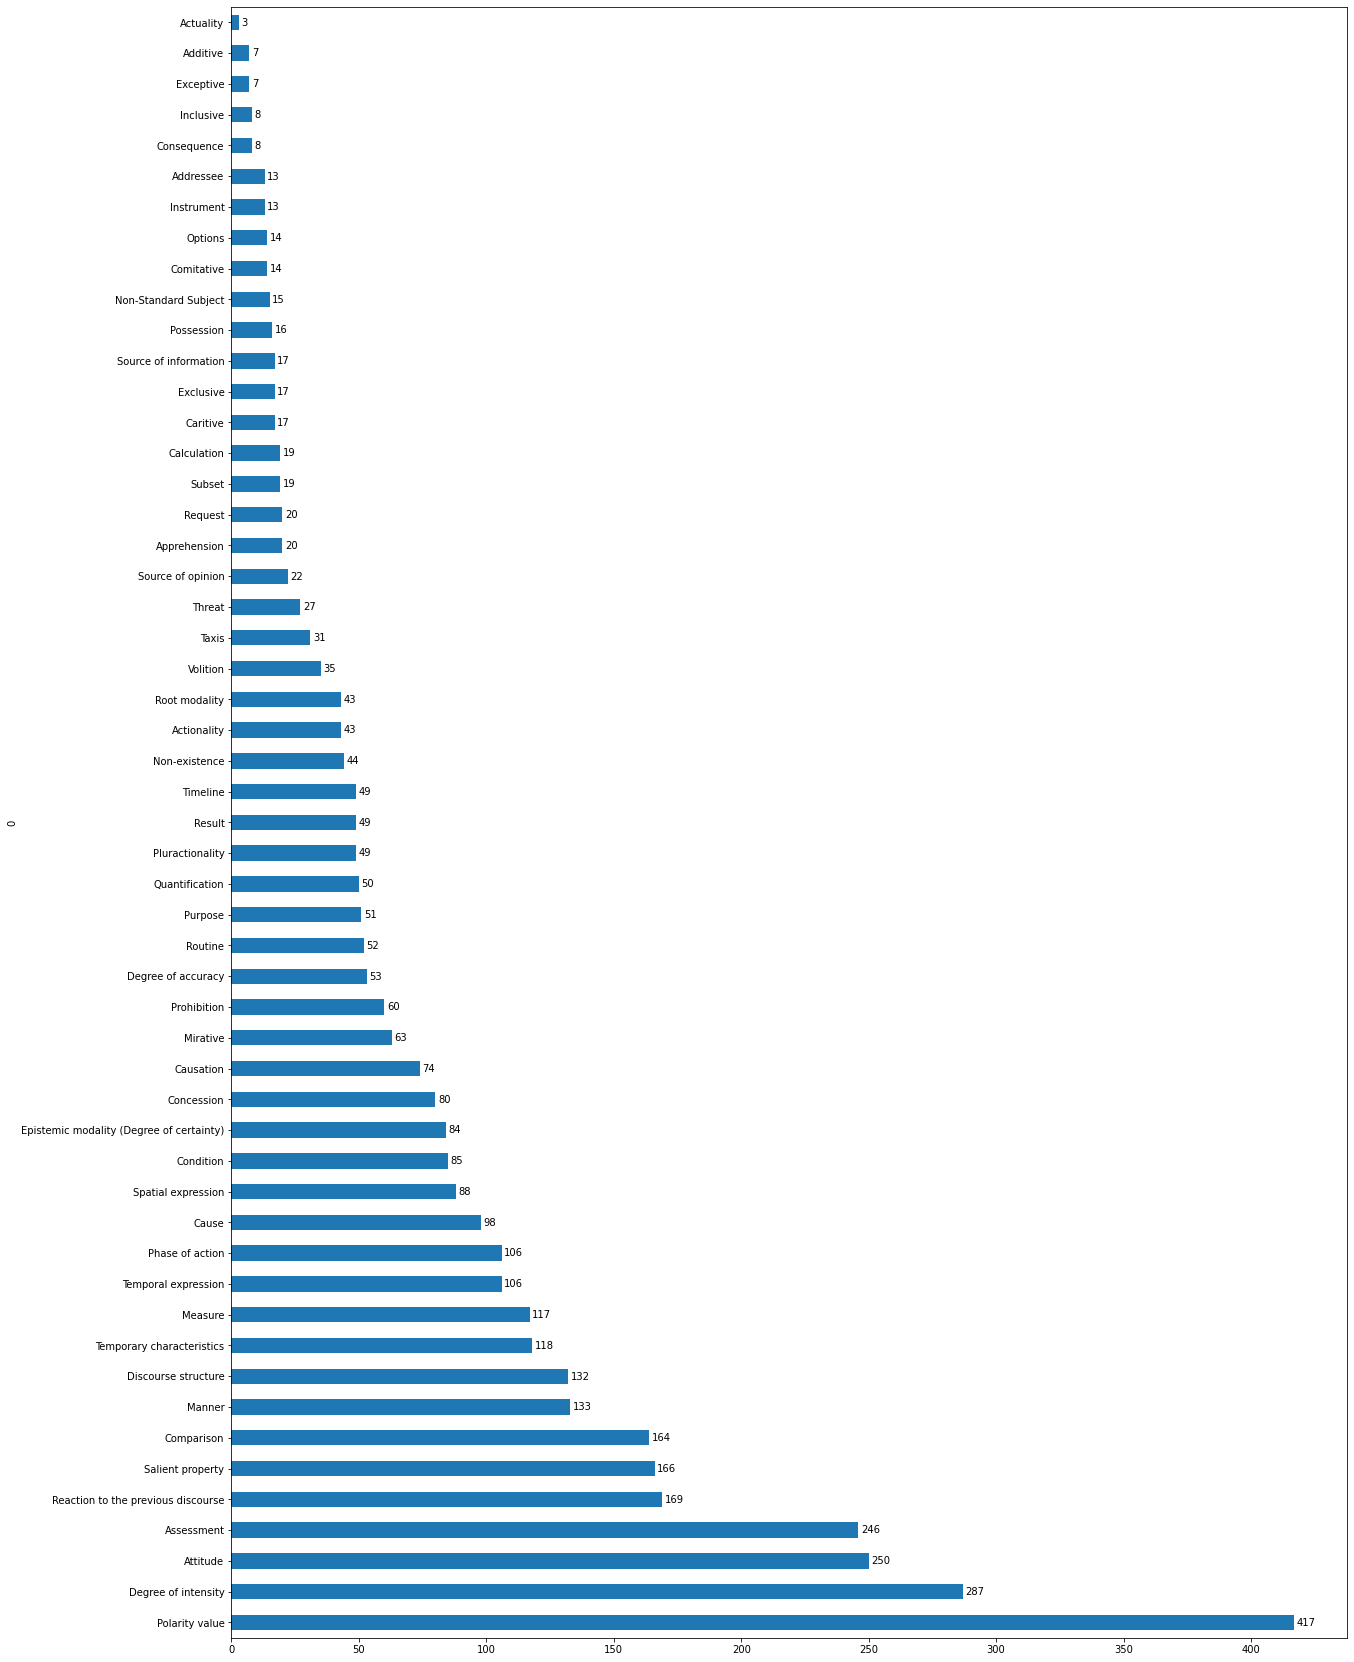

In [29]:
df.iloc[:, range(start, stop + 1)].notnull().sum().sort_values(ascending=False).plot(kind='barh', figsize=(20, 30))
for index, value in enumerate(df.iloc[:, range(start, stop + 1)].notnull().sum().sort_values(ascending=False)):
    plt.text(value + 1, index - .1, str(value))

Для выбора фильтра по синтаксическому типу конструкции заменить *Biclausal Construction* на нужный тип.

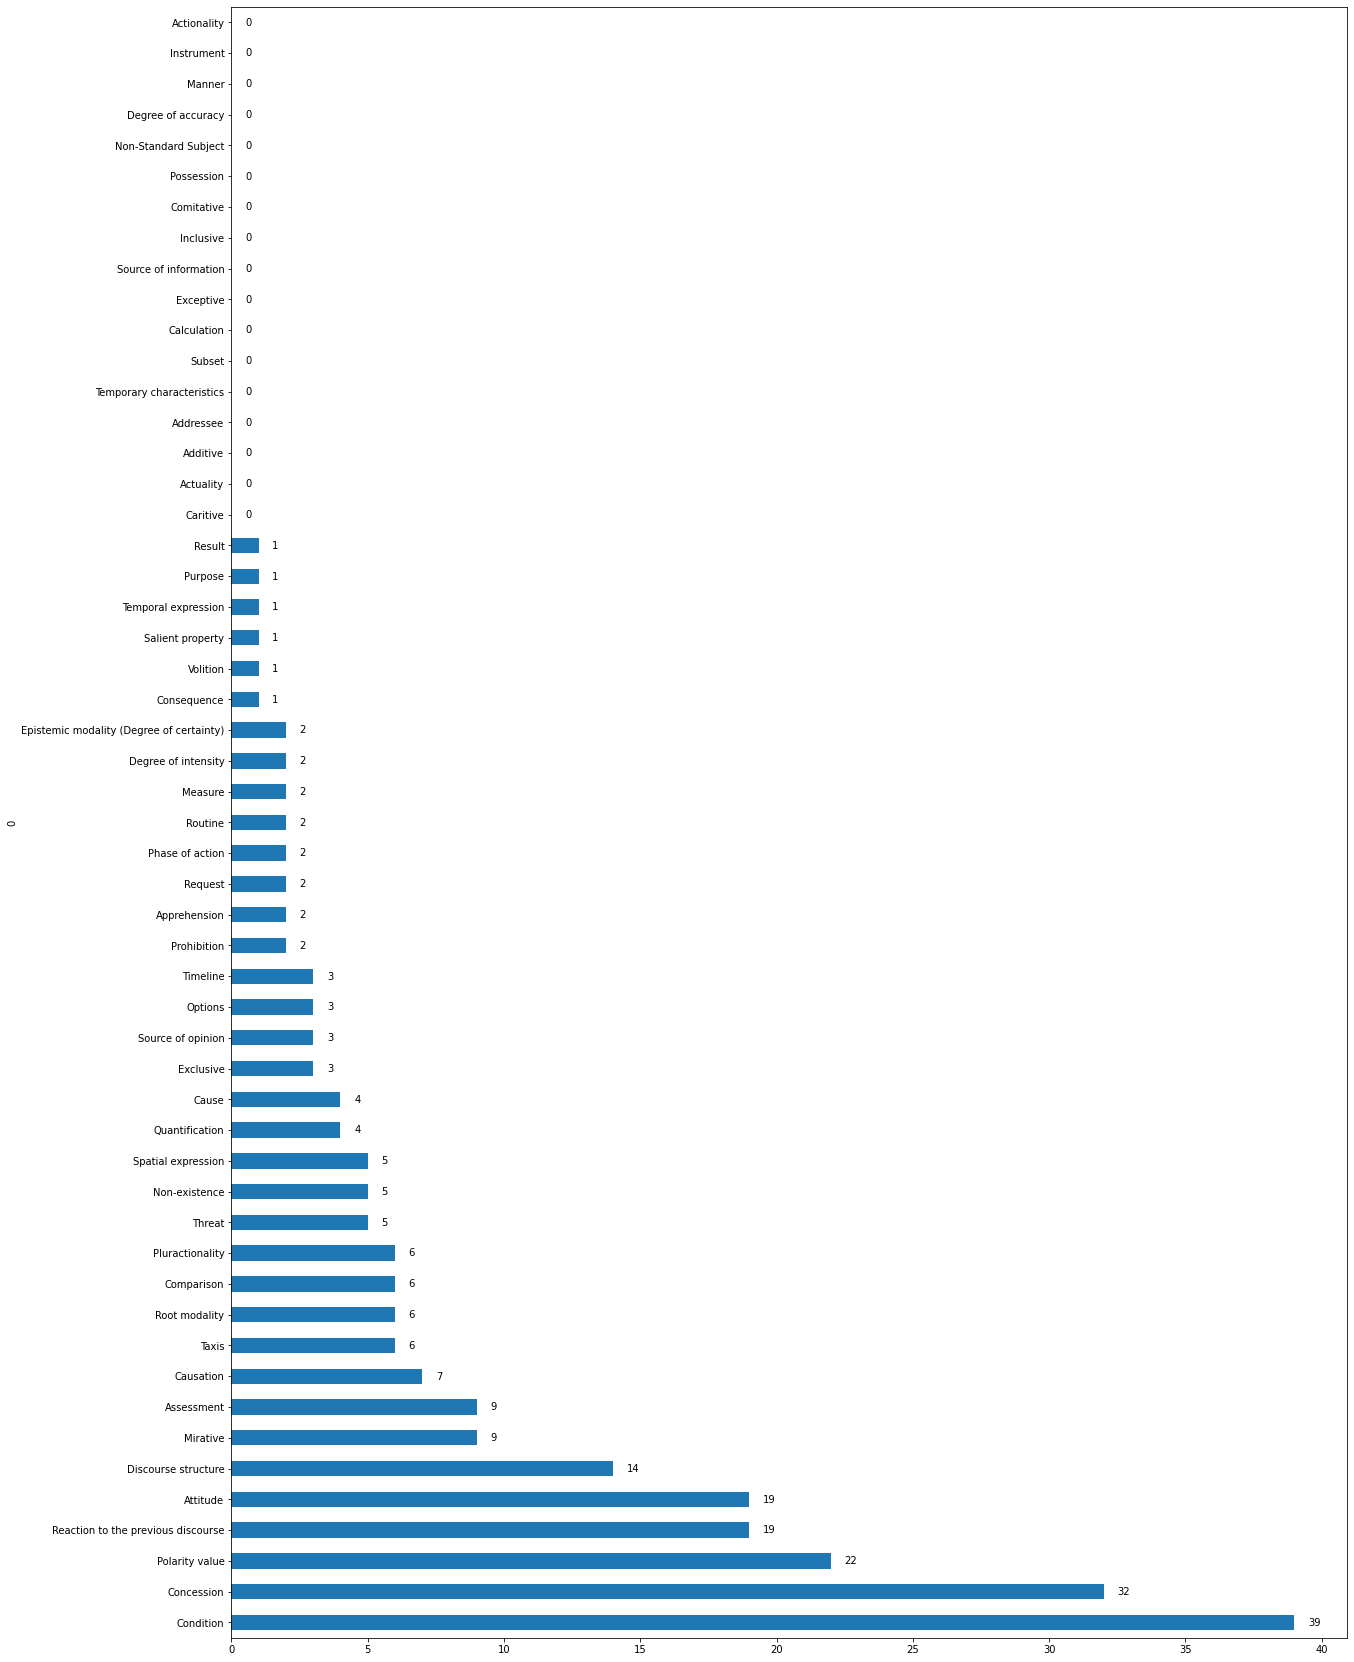

In [31]:
df[df['Synt. type of construction'] == 'Biclausal Construction'].iloc[:, range(start, stop + 1)].notnull().sum().sort_values(ascending=False).plot(kind='barh', figsize=(20, 30))
for index, value in enumerate(df[df['Synt. type of construction'] == 'Biclausal Construction'].iloc[:, range(start, stop + 1)].notnull().sum().sort_values(ascending=False)):
    plt.text(value + 0.5, index - .1, str(value))

## Распределение конструкций по синтаксическим типам

10 самых частотных синтаксических типов конструкции

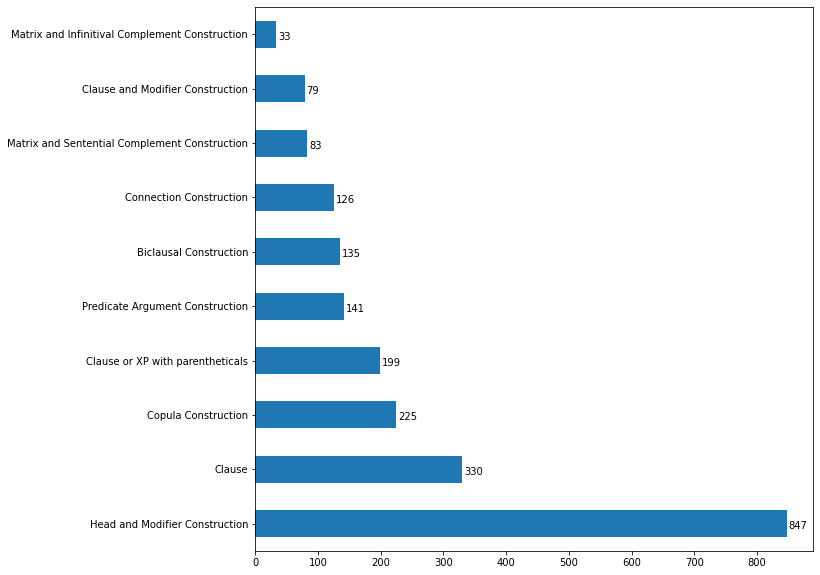

In [35]:
df['Synt. type of construction'].value_counts()[:10].plot(kind='barh', figsize=(10, 10))
for index, value in enumerate(df['Synt. type of construction'].value_counts()[:10]):
    plt.text(value + 3, index - .1, str(value))

10 самых частотных типов якоря

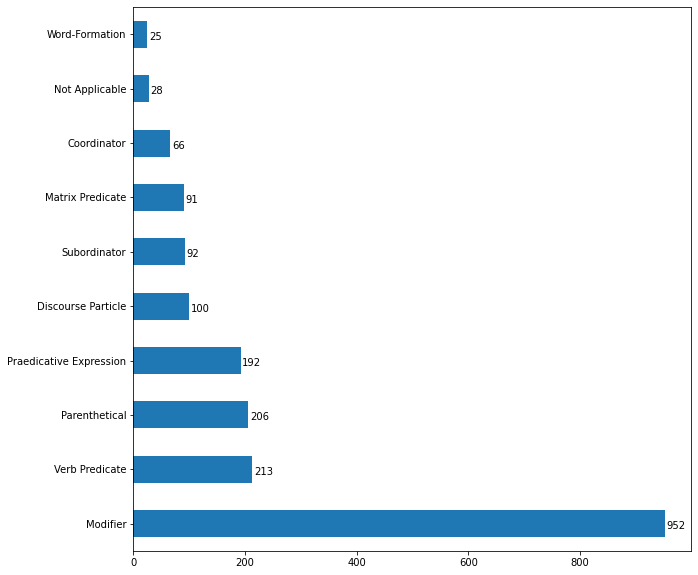

In [36]:
df['Synt. func. of anchor'].value_counts()[:10].plot(kind='barh', figsize=(10, 10))
for index, value in enumerate(df['Synt. func. of anchor'].value_counts()[:10]):
    plt.text(value + 3, index - .1, str(value))

## Топ частотных якорей

In [13]:
constr = df.Name.tolist()
constr = ' '.join([re.sub(r'[\(\)~\-/1234567890\.A-Za-z]', ' ', c) for c in constr])

In [14]:
nlp = spacy.load('ru_core_news_md')

In [15]:
def preprocess(text, model):
    """
    Function takes text as an input
    and transforms it into dictionary 
    with POSes as keys and words as values
    """

    docum = model(text)
    p = [(w.lemma_, w.pos_ )for w in docum]
    words = [i[0] for i in p]
    poses = [i[1] for i in p]
    pos_dict = {p: [] for p in list(set(poses))}
    for word, pos in zip(words, poses):
        pos_dict[pos].append(word)
    return pos_dict

In [16]:
pos_dict = preprocess(constr, nlp)

In [17]:
pos_dict.keys()

dict_keys(['NUM', 'ADP', 'SPACE', 'ADJ', 'PRON', 'SCONJ', 'PUNCT', 'ADV', 'DET', 'CCONJ', 'VERB', 'PROPN', 'NOUN', 'PART', 'AUX', 'X'])

### Топ-10 глаголов

In [18]:
Counter(pos_dict['VERB']).most_common(10)

[('знать', 24),
 ('говорить', 22),
 ('хотеть', 18),
 ('быть', 16),
 ('дать', 16),
 ('нет', 16),
 ('сказать', 15),
 ('мочь', 15),
 ('иметь', 12),
 ('делать', 8)]

### Топ-10 существительных

In [19]:
Counter(pos_dict['NOUN']).most_common(10)

[('время', 26),
 ('дело', 25),
 ('раз', 25),
 ('чёрт', 18),
 ('пора', 16),
 ('день', 16),
 ('случай', 15),
 ('вид', 15),
 ('рука', 13),
 ('слово', 12)]

### Топ-10 прилагательных

In [20]:
Counter(pos_dict['ADJ']).most_common(10)

[('равный', 19),
 ('хороший', 14),
 ('самый', 9),
 ('сам', 8),
 ('полный', 7),
 ('нужный', 7),
 ('другой', 6),
 ('плохой', 5),
 ('последний', 4),
 ('целый', 4)]

### Топ-10 наречий

In [21]:
Counter(pos_dict['ADV']).most_common(10)

[('так', 64),
 ('ещё', 38),
 ('как', 22),
 ('хоть', 14),
 ('тут', 13),
 ('можно', 13),
 ('там', 10),
 ('надо', 10),
 ('здесь', 9),
 ('куда', 8)]